Atividade 02: Agrupamento

Objetivo:

Aplicar conceitos de Mineração de Dados, com foco em algoritmos
de agrupamento, utilizando o K-Means. Visamos segmentar clientes com base em
seus padrões de consumo e perfis demográficos.

Cenário:

Uma empresa de marketing deseja segmentar seus clientes para criar campanhas mais eficientes. Com base no dataset "marketing_campaign.csv", contendo informações como idade, renda e hábitos de compra. Identificar diferentes grupos de consumidores, auxiliando na tomada de decisão para campanhas personalizadas.



Informações sobre o Dataset

A Análise de Personalidade do Cliente é uma análise detalhada dos clientes ideais de uma empresa. Ela auxilia o negócio a compreender melhor seus clientes, facilitando a adaptação de produtos às necessidades, comportamentos e preocupações específicas de diferentes tipos de clientes.

A análise de personalidade do cliente permite que uma empresa ajuste seus
produtos com base nos clientes-alvo de diferentes segmentos. Por exemplo, em vez de gastar dinheiro promovendo um novo produto para todos os clientes do banco de dados da empresa, a empresa pode analisar qual segmento de clientes tem maior probabilidade de comprá-lo e direcionar a divulgação apenas para esse segmento específico.

No dataset há um total de 29 colunas.

As colunas podem ser entendidas da seguinte forma:

Pessoas:

● ID: Identificador único do cliente

● Year_Birth: Ano de nascimento do cliente

● Education: Nível de escolaridade do cliente

● Marital_Status: Estado civil do cliente

● Income: Renda anual familiar do cliente

● Kidhome: Número de crianças no domicílio do cliente

● Teenhome: Número de adolescentes no domicílio do cliente

● Dt_Customer: Data de cadastro do cliente na empresa

● Recency: Número de dias desde a última compra do cliente

● Complain: 1 se o cliente fez uma reclamação nos últimos 2 anos, 0 caso contrário

Produtos:

● MntWines: Quantia gasta com vinhos nos últimos 2 anos

● MntFruits: Quantia gasta com frutas nos últimos 2 anos

● MntMeatProducts: Quantia gasta com carne nos últimos 2 anos

● MntFishProducts: Quantia gasta com peixes nos últimos 2 anos

● MntSweetProducts: Quantia gasta com doces nos últimos 2 anos

● MntGoldProds: Quantia gasta com ouro nos últimos 2 anos

Promoção:

● NumDealsPurchases: Número de compras feitas com desconto

● AcceptedCmp1: 1 se o cliente aceitou a oferta na 1ª campanha, 0 caso contrário

● AcceptedCmp2: 1 se o cliente aceitou a oferta na 2ª campanha, 0 caso contrário

● AcceptedCmp3: 1 se o cliente aceitou a oferta na 3ª campanha, 0 caso contrário

● AcceptedCmp4: 1 se o cliente aceitou a oferta na 4ª campanha, 0 caso contrário

● AcceptedCmp5: 1 se o cliente aceitou a oferta na 5ª campanha, 0 caso contrário

● Response: 1 se o cliente aceitou a oferta na última campanha, 0 caso contrário

Local:

● NumWebPurchases: Número de compras feitas pelo site da empresa

● NumCatalogPurchases: Número de compras feitas por catálogo

● NumStorePurchases: Número de compras feitas diretamente em lojas físicas

● NumWebVisitsMonth: Número de visitas ao site da empresa no último mês

**1. Leitura e Tratamento dos dados**

In [1]:
# Instalando e importando bibliotecas que serão utilizada para analise.
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# importando a base de dados que será utilizada como dataframe.
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename, sep="\t", engine = "python")

#exibe o dataset
df.head()

Saving marketing_campaign.csv to marketing_campaign.csv


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


Visualização do dataframe, com 2.240 linhas e 29 colunas

In [3]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


Exibindo informações sobre o dataset com a função describe

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


utilizando a função Info do pandas para visualizar os tipos de dados

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Com a função Isnull().sum(), podemos verificar a quantidade de dados nulos.


In [6]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


Calculando quanto representa os 24 registros nulos da coluna Income.

In [7]:
percentual_nulos = df['Income'].isna().sum() / len(df) * 100
print(f'Valores nulos em Income: {percentual_nulos:.2f}%')

Valores nulos em Income: 1.07%


Após identificar que na coluna Income existem 24 registros nulos, calcularmos que isso representa 1,07% do dataset.
Cocluimos que os nulos representa menos de 2% do dataset, com isso é uma boa opção apagar estes registros, pois não vai impactar o K-Means na divisão dos clusters.


In [8]:
# Removendo as linha com valores nulos em Income.
df = df.dropna(subset=['Income'])

Resultado após remover os nulos em Income

In [9]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [10]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


Selecionando colunas numéricas  ['Year_Birth', 'Income', 'Kidhome', 'Teenhome'] para calcular outliers.

2. Exploração e Visualização dos Dados

● Histogramas com a distribuição de idade e renda dos clientes.

In [11]:
num_cols = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome']

num_cols

['Year_Birth', 'Income', 'Kidhome', 'Teenhome']

Identificando os outliers:

In [12]:
outliers_dict = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)]
    outliers_dict[col] = outliers.shape[0]

In [13]:
for col, count in outliers_dict.items():
    print(f"Coluna '{col}' tem {count} outliers.")

Coluna 'Year_Birth' tem 3 outliers.
Coluna 'Income' tem 8 outliers.
Coluna 'Kidhome' tem 0 outliers.
Coluna 'Teenhome' tem 0 outliers.


Grafico de boxplot para visualizar os outliers:

<Figure size 1200x800 with 0 Axes>

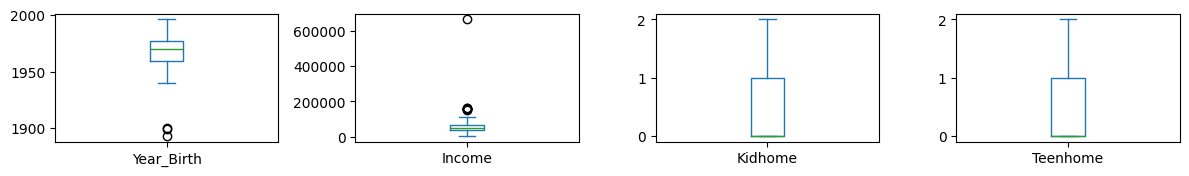

In [14]:
# tamanho da figura
plt.figure(figsize=(12,8))

# boxplot
df[num_cols].plot(kind='box', subplots=True, layout=(6,5), figsize=(15,10), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

Após identificar que na coluna 'Year_Birth' tem 3 outliers e na Coluna 'Income' tem 8 outliers e calcular que isso representa em porcentagem do dataset uma quantidade insignificante, resolvemos dropar estes registros, pois se deixar no dataset estes dados eles podem afetar a decisão dos cluster pelo k-means.

Porcentagem de outliers:
Outliers em Year_Birth: 0.14% do dataset
Outliers em Income: 0.36% do dataset


In [15]:
def calcular_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

#outliers
    outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)]

#porcentagem de outliers no dataset
    percentual_outliers = len(outliers) / len(df) * 100
    return percentual_outliers

#Calcula para Year_Birth e Income
percentual_year_birth = calcular_outliers(df, 'Year_Birth')
percentual_income = calcular_outliers(df, 'Income')

print(f'Outliers em Year_Birth: {percentual_year_birth:.2f}% do dataset')
print(f'Outliers em Income: {percentual_income:.2f}% do dataset')

Outliers em Year_Birth: 0.14% do dataset
Outliers em Income: 0.36% do dataset


In [16]:
if percentual_year_birth < 2:
    df = df[(df['Year_Birth'] >= df['Year_Birth'].quantile(0.25) - 1.5 * (df['Year_Birth'].quantile(0.75) - df['Year_Birth'].quantile(0.25))) &
            (df['Year_Birth'] <= df['Year_Birth'].quantile(0.75) + 1.5 * (df['Year_Birth'].quantile(0.75) - df['Year_Birth'].quantile(0.25)))]
    print("Outliers de Year_Birth removidos!")

if percentual_income < 2:
    df = df[(df['Income'] >= df['Income'].quantile(0.25) - 1.5 * (df['Income'].quantile(0.75) - df['Income'].quantile(0.25))) &
            (df['Income'] <= df['Income'].quantile(0.75) + 1.5 * (df['Income'].quantile(0.75) - df['Income'].quantile(0.25)))]
    print("Outliers de Income removidos!")


Outliers de Year_Birth removidos!
Outliers de Income removidos!


In [17]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


**2. Exploração e Visualização dos Dados **


**Histograma Distribuição de Clientes por Faixa Etária e Média de Renda Anual**

Histograma indica quantos clientes estão em cada faixa etária.

A linha vermelha mostra a renda média de cada grupo etário.

Relação entre idade e renda

Perfil dos clientes.

Podemos concluir deste dataset que possui uma relação entre idade e renda, pois quanto maior a idade maior a renda do cliente.

Calculos que foram feitos:

Calcular idade: considerando o ano de 2025 menos a data de nascimento coluna 'Year_Birth'

Criar faixas etárias para termos os ranges e plotar no grafico.

bins = [18, 30, 40, 50, 60, 70, 80, 100]

labels = ['18-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80+']

Criar um DataFrame para calcular a média de renda por faixa etária
df_renda

Criar histograma com a contagem de clientes por faixa etária

Criar um segundo eixo para a linha de renda média

Criar os rótulos: 'Faixa Etária', 'Número de Clientes'

Criar label: 'Renda Média Anual'

Título: 'Distribuição de Clientes por Faixa Etária e Média de Renda Anual'


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

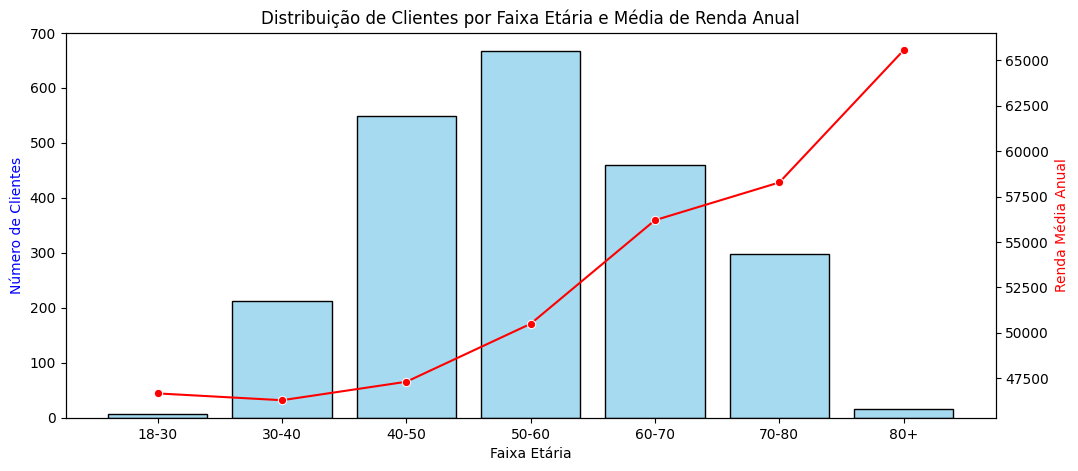

In [22]:
# Calcular idade
df['Age'] = 2025 - df['Year_Birth']

# Faixa etária
bins = [18, 30, 40, 50, 60, 70, 80, 100]
labels = ['18-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80+']
df['Faixa_Etaria'] = pd.cut(df['Age'], bins=bins, labels=labels)

# df_renda para calcular a média de renda por faixa etária
df_renda = df.groupby('Faixa_Etaria')['Income'].mean().reset_index()

# Figura
fig, ax1 = plt.subplots(figsize=(12, 5))

# Histograma com a contagem de clientes por faixa etária
sns.histplot(df, x='Faixa_Etaria', discrete=True, shrink=0.8, color='skyblue', ax=ax1)

# Segundo eixo para a linha da renda média
ax2 = ax1.twinx()
sns.lineplot(x='Faixa_Etaria', y='Income', data=df_renda, marker='o', color='red', ax=ax2)

# Rótulos
ax1.set_xlabel('Faixa Etária')
ax1.set_ylabel('Número de Clientes', color='blue')
ax2.set_ylabel('Renda Média Anual', color='red')

# Título do gráfico
plt.title('Distribuição de Clientes por Faixa Etária e Média de Renda Anual')

plt.show()


**Gráfico de dispersão: 'Relação entre Renda e Gasto Total'**


Correlação entre renda e gastos, existe uma tendência positiva, clientes com maior renda gastam mais.

Distribuição dos clientes onde temos clientes de alta renda com gasto altos, com bastante pontos acima da média. E temos os de baixa renda com gastos baixos e abaixo da média de gastos.

Outliers – Clientes com gastos muito altos ou muito baixos em relação à sua renda.

coluna de Total de Gastos é a soma das colunas de compras: ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']


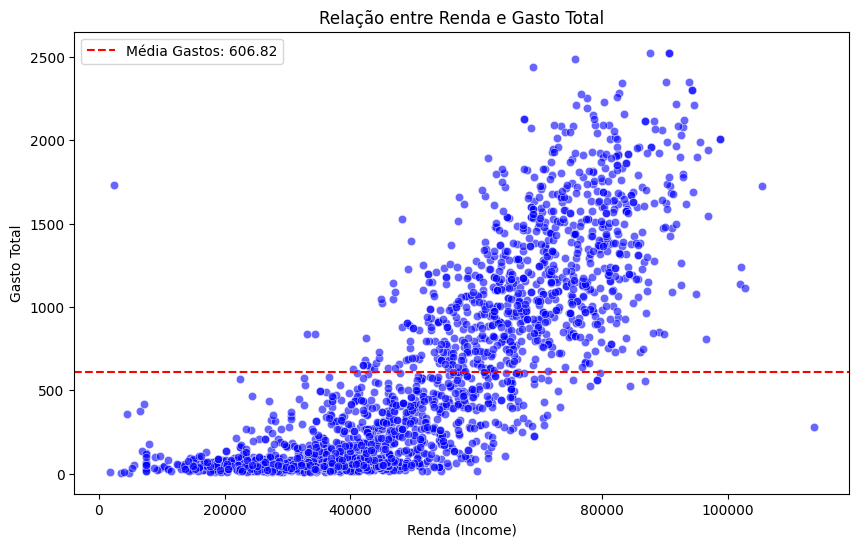

In [23]:

# Coluna de Total de Gastos que é a soma das colunas de compras 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
df['Total_Gasto'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Média dos gastos
media_gastos = df['Total_Gasto'].mean()

# scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Total_Gasto', data=df, alpha=0.6, color='blue')

# Linha horizontal é a média dos gastos
plt.axhline(y=media_gastos, color='red', linestyle='--', label=f'Média Gastos: {media_gastos:.2f}')

# rótulos e título
plt.xlabel('Renda (Income)')
plt.ylabel('Gasto Total')
plt.title('Relação entre Renda e Gasto Total')

plt.legend()

plt.show()


In [24]:
# coluna de Total_Gasto
df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Total_Gasto']]

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Gasto
0,635,88,546,172,88,88,1617
1,11,1,6,2,1,6,27
2,426,49,127,111,21,42,776
3,11,4,20,10,3,5,53
4,173,43,118,46,27,15,422
...,...,...,...,...,...,...,...
2235,709,43,182,42,118,247,1341
2236,406,0,30,0,0,8,444
2237,908,48,217,32,12,24,1241
2238,428,30,214,80,30,61,843


**Boxplots: 'Distribuição de Gastos por Segmento'**

Média e dispersão dos gastos para cada segmento.

Outliers – Clientes que gastam muito acima da média em determinadas categorias.

Comparação entre categorias – Exemplo: O gasto com vinhos pode ser muito maior que o gasto com doces.

Colunas de gastos ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

boxplots para os diferentes segmentos de consumo


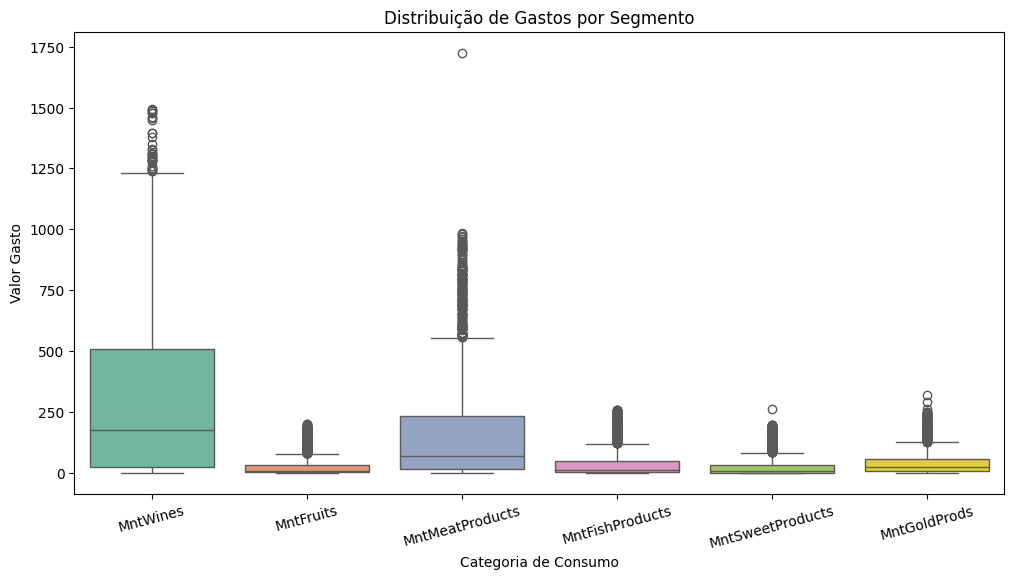

In [25]:
# Colunas de gastos
gastos_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
               'MntSweetProducts', 'MntGoldProds']

# Boxplots: diferentes segmentos de consumo
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[gastos_cols], palette='Set2')

# Rótulos
plt.xlabel('Categoria de Consumo')
plt.ylabel('Valor Gasto')
plt.title('Distribuição de Gastos por Segmento')

# Rotacionar os nomes das categorias para melhor visualização
plt.xticks(rotation=15)

plt.show()


**Normalizar os atributos numericos para padronização**

In [26]:
from sklearn.preprocessing import StandardScaler

cols = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
            'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
            'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
            'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
            'NumWebVisitsMonth', 'Total_Gasto', 'Age']

data = df[cols]

scaler = StandardScaler()

data_scaled = scaler.fit_transform(data)

data = pd.DataFrame(data_scaled, columns=data.columns)

#dado agora normalizado
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Faixa_Etaria,Total_Gasto
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,3,11,1,68,60-70,1617
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,3,11,0,71,70-80,27
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,3,11,0,60,50-60,776
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,3,11,0,41,40-50,53
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,3,11,0,44,40-50,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,3,11,0,58,50-60,1341
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,1,0,0,3,11,0,79,70-80,444
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,0,0,0,3,11,0,44,40-50,1241
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,3,11,0,69,60-70,843


Rodando o Algoritimo K-Means



**Método do Cotovelo para decisão do melhor k**

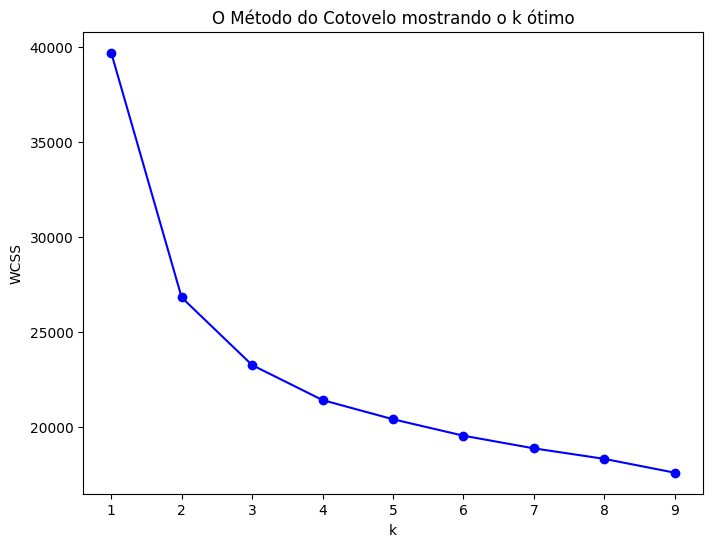

In [27]:
from matplotlib import pyplot as plt

WCSS = [] #para armazenar os resultados
K = range(1,10)

# considerando diversos valores de k
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    # calcula a medida e armazena em uma lista
    WCSS.append(kmeans.inertia_)

# apresenta os resultados
plt.figure(figsize=(8,6))
plt.plot(K, WCSS, '-bo')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('O Método do Cotovelo mostrando o k ótimo')
plt.show()

In [28]:
k = 3

kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(data)
clusters = kmeans.predict(data)

In [29]:
data['Label'] = clusters

data['Label'] = data['Label'].map({ 0: "Idoso",
                                    1: "Adulto",
                                    2: "Jovem"}).astype('object')

data

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Total_Gasto,Age,Label
0,-1.017189,0.314651,-0.823405,-0.930767,0.310830,0.974566,1.548614,1.748400,2.449154,1.480301,0.849556,0.361479,1.424772,2.628526,-0.562650,0.689203,1.679323,1.017189,Idoso
1,-1.273530,-0.254877,1.038757,0.906602,-0.380600,-0.874776,-0.638664,-0.731678,-0.652345,-0.635399,-0.735767,-0.168834,-1.132957,-0.588043,-1.179732,-0.139645,-0.963897,1.273530,Jovem
2,-0.333612,0.965354,-0.823405,-0.930767,-0.795458,0.355155,0.568110,-0.175957,1.336263,-0.149031,-0.039771,-0.699147,1.424772,-0.230646,1.288596,-0.554069,0.281242,0.333612,Idoso
3,1.289883,-1.206087,1.038757,-0.930767,-0.795458,-0.874776,-0.563241,-0.667380,-0.506392,-0.586763,-0.755100,-0.168834,-0.767567,-0.945440,-0.562650,0.274779,-0.920675,-1.289883,Jovem
4,1.033542,0.322136,1.038757,-0.930767,1.555404,-0.394659,0.417263,-0.217292,0.150396,-0.003121,-0.561768,1.422105,0.328602,0.126750,0.054432,-0.139645,-0.307248,-1.033542,Jovem
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,-0.162718,0.463624,-0.823405,0.906602,-0.104028,1.193879,0.417263,0.076644,0.077420,2.209853,3.923536,-0.168834,1.790162,0.126750,-0.562650,-0.139645,1.220500,0.162718,Idoso
2201,-1.957107,0.598401,2.900920,0.906602,0.241687,0.295881,-0.663806,-0.621452,-0.688833,-0.659718,-0.697100,2.482731,1.424772,-0.230646,-0.254109,0.689203,-0.270675,1.957107,Adulto
2202,1.033542,0.258780,-0.823405,-0.930767,1.451690,1.783653,0.542969,0.237389,-0.105022,-0.367897,-0.387769,-0.699147,-0.767567,0.126750,2.214218,0.274779,1.054260,-1.033542,Idoso
2203,-1.102636,0.851004,-0.823405,0.906602,-1.417746,0.361082,0.090428,0.223611,0.770696,0.069834,0.327560,-0.168834,0.693992,0.841543,1.288596,-0.968493,0.392623,1.102636,Adulto


<Axes: xlabel='Income', ylabel='Total_Gasto'>

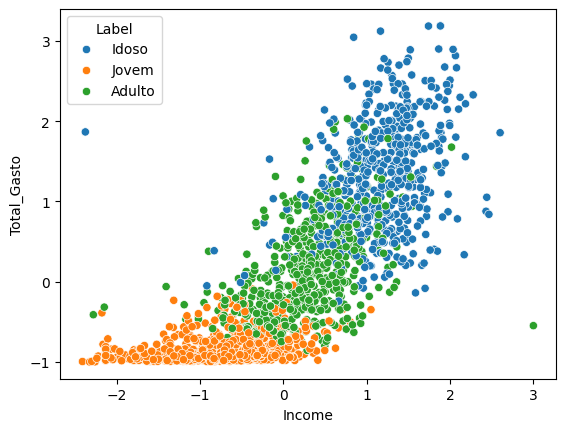

In [30]:
sns.scatterplot(data=data, x='Income', y='Total_Gasto', hue='Label')

In [52]:
from sklearn.metrics import silhouette_score

**Indice de Silhueta para medir coesão dos clusters**

In [59]:
silhouette_avg = silhouette_score(data_scaled, clusters)
print(f"Silhouette Score com K-Means: {silhouette_avg:.4f}")

Silhouette Score com K-Means: 0.2341


In [54]:
# Usa o df original e guarda os nomes antes de escalar
data = df[cols].copy()  # <- Garante que estamos pegando só as colunas numéricas certas
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Agora sim reconstruímos o DataFrame corretamente
data = pd.DataFrame(data_scaled, columns=cols)  # <- usa 'cols' para manter as colunas corretas


Rodando K-Means++...


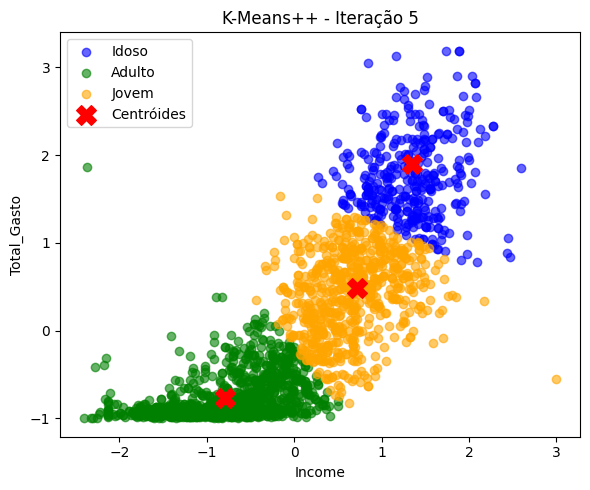

In [57]:
def plot_kmeans(init_method, ax, title):
    kmeans = KMeans(n_clusters=3, init=init_method, random_state=42, n_init=1, max_iter=1)

    label_map = {0: "Idoso", 1: "Adulto", 2: "Jovem"}
    color_map = {"Jovem": "orange", "Adulto": "green", "Idoso": "blue"}

    # Usar apenas as colunas numéricas para KMeans
    features = data[["Income", "Total_Gasto"]].copy()

    for i in range(5):  # Mostrar as primeiras 5 iterações
        kmeans.fit(features)
        labels = kmeans.predict(features)

        # Criar um novo DataFrame para plotar, com os rótulos
        plot_df = features.copy()
        plot_df["Label"] = [label_map[l] for l in labels]
        centroids = kmeans.cluster_centers_

        ax.clear()

        # Plotar os pontos por categoria com legenda
        for grupo in plot_df["Label"].unique():
            subset = plot_df[plot_df["Label"] == grupo]
            ax.scatter(
                subset["Income"],
                subset["Total_Gasto"],
                c=color_map[grupo],
                alpha=0.6,
                label=grupo
            )

        # Plotar os centróides
        ax.scatter(
            centroids[:, 0],
            centroids[:, 1],
            marker="X",
            s=200,
            c="red",
            label="Centróides"
        )

        ax.set_title(f"{title} - Iteração {i+1}")
        ax.set_xlabel("Income")
        ax.set_ylabel("Total_Gasto")
        ax.legend()

    return silhouette_score(features, labels)

fig, ax = plt.subplots(1, 1, figsize=(6, 5))

print("Rodando K-Means++...")
silhouette_plus = plot_kmeans("k-means++", ax, "K-Means++")

plt.tight_layout()
plt.show()

**Indice de Silhueta para medir coesão dos clusters**

In [58]:
print(f"Silhouette Score com K-Means++: {silhouette_plus:.4f}")

Silhouette Score com K-Means++: 0.5091


**Conclusão**


Padrões identificados nos Agrupamentos:
Analisamos como as variáveis renda (Income) e gasto total (Total_Gasto) influenciam na segmentação dos clientes.
Com base no K-Means, cada cluster apresenta padrões específicos que refletem seu comportamento financeiro e os clusters são descritos da seguinte maneira:
Grupo "Jovem" (Laranja)
Os indivíduos desse grupo possuem baixa renda e baixo gasto total, esse padrão pode indicar um perfil de jovens em início de carreira, estudantes ou profissionais com pouca estabilidade financeira.
Grupo "Adulto" (Verde)
Esse grupo apresenta renda e gastos médios, sugerindo um perfil de indivíduos financeiramente ativos e estabilizados, são pessoas que já consolidaram suas carreiras, possuem um planejamento financeiro mais estruturado e mantêm um equilíbrio entre ganhos e despesas.
Grupo "Idoso" (Azul)
O grupo dos idosos possui um comportamento contraditório em relação à renda e ao consumo, sua renda média ser mais baixa que a dos adultos, seus gastos totais são mais elevados. Esse padrão pode estar relacionado a despesas específicas, como saúde, lazer e bem-estar, que costumam ter maior peso nessa fase da vida, dependem de aposentadorias, reservas financeiras ou suporte familiar para manter seu padrão de consumo.
Os resultados do agrupamento mostram que a renda e o gasto total seguem padrões distintos em cada faixa etária. Jovens apresentam menor capacidade de consumo, adultos encontram um equilíbrio entre renda e despesa, enquanto idosos mantêm gastos elevados, apesar da menor renda. Esses padrões podem ser úteis para estratégias de segmentação de mercado, oferta de produtos e políticas de planejamento financeiro voltadas para diferentes perfis de consumidores.

Análise do índice de Silhouette Score
O índice de silhueta (Silhouette Score) é uma métrica usada para avaliar a qualidade dos agrupamentos (clusters) feito por algoritmo como o K-Means.
Ele mede o quanto cada ponto está relacionado ao seu próprio cluster em comparação com outros clusters.
O valor do Silhouette Score varia de -1 a 1:
+1 → O ponto está muito bem atribuído ao seu próprio cluster.
0 → O ponto está na fronteira entre dois clusters.
-1 → O ponto pode estar mal alocado.

Resultado obtido na análise:
Silhouette Score com K-Means: 0.2341
Silhouette Score com K-Means++: 0.5091
O valor 0.2341, indica clusters com sobreposição significativa, baixa coesão interna e possível alocação incorreta de pontos.
O valor 0.5091 com K-Means++ representa uma melhor qualidade de agrupamento, com os clientes mais bem separados e internamente mais coesos dentro de seus grupos.
No K-means++ mostrou ser mais eficiente para este conjunto de dados formando clusters agrupados e com melhor definição e separação entre eles.

Conclusões
•	Quanto maior a renda, maior o gasto total, indicando que a empresa pode segmentar suas ofertas com base no poder aquisitivo.
•	O grupo jovem tem menor participação nos gastos totais, o que sugere a necessidade de estratégias para aumentar sua conversão e engajamento.
•	O grupo idoso representa os clientes mais lucrativos, tornando essencial garantir sua satisfação e retenção.

Sugestão de estratégias de marketing baseada nos resultados:
0	Adulto	Ofertas em combos de produtos do dia a dia (vinho + carne + doces).	E-mail marketing com promoções sazonais e fidelidade.
1	Jovem	Descontos em primeira compra e produtos de menor valor unitário.	Redes sociais e campanhas digitais com cupons.
2	Idoso	Programas de fidelidade premium e produtos sofisticados (vinhos, ouro).	Catálogo físico ou contato direto com consultores.


Limitações do K-Means:
O K-Means é utilizado amplamente, por possuir uma simplicidade e eficiência, mas possui limitações importantes, tais como assumir Clusters Globulares e Esféricos, pressupõe que os clusters são esféricos e de tamanho semelhante. Isso significa que ele funciona melhor quando os grupos são bem separados e têm distribuição semelhante em todas as direções (formato de "bola"). Em dados com clusters alongados, irregulares ou com diferentes densidades, o K-Means pode agrupar incorretamente. Ele é sensível a Outliers, utilizando médias (centroides), o que torna o algoritmo sensível à outliers, pois esses pontos podem deslocar significativamente os centroides. O número de Clusters (K) precisa ser definido, o algoritmo exige que o número de clusters seja informado a priori, o que pode ser desafiador quando não se tem conhecimento prévio da estrutura dos dados, e limitações em dados categóricos o K-Means depende de distância Euclidiana, que não é adequada para variáveis categóricas, mesmo com técnicas de codificação, o resultado pode ser distorcido.
Possíveis Melhorias e Alternativas é utilizar o próprio K-Means++.
